# Cambio en el precio de la opción "Put" con distinto tiempo a vencimiento

In [2]:
import matplotlib.pyplot as plt
import numpy as np;
import blackscholes as bs

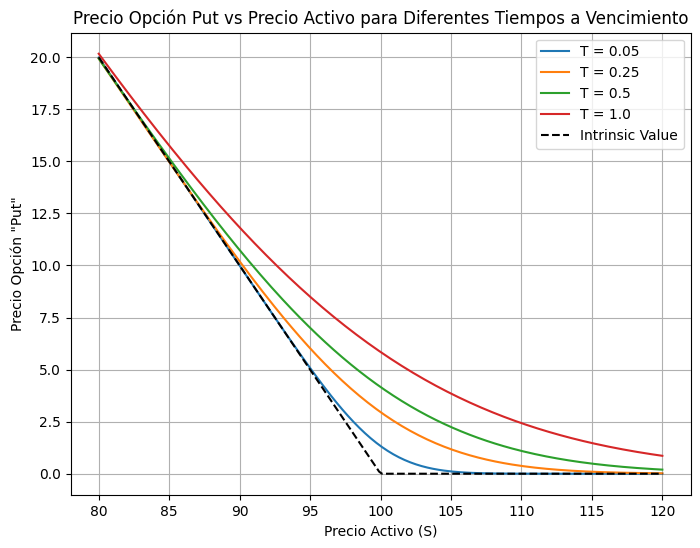

In [5]:
S_T = 100.0
r_f = 0.0025
sigma = 0.15
q = 0.0

S_range = np.linspace(80, 120, 200)
T_values = [0.05, 0.25, 0.5, 1.0]

plt.figure(figsize=(8, 6))

for T in T_values:
    put_prices = []
    for S in S_range:
        put = bs.BlackScholesPut(S, S_T, T, r_f, sigma, q)
        put_prices.append(put.price())
    plt.plot(S_range, put_prices, label=f'T = {T}')
intrinsic_values = np.maximum(S_T - S_range, 0)
plt.plot(S_range, intrinsic_values, 'k--', label='Intrinsic Value')

plt.xlabel('Precio Activo (S)')
plt.ylabel('Precio Opción "Put"')
plt.title('Precio Opción Put vs Precio Activo para Diferentes Tiempos a Vencimiento')
plt.legend()
plt.grid(True)
plt.show()

# Cambio en el precio de la opción "Call" con distinto tiempo a vencimiento

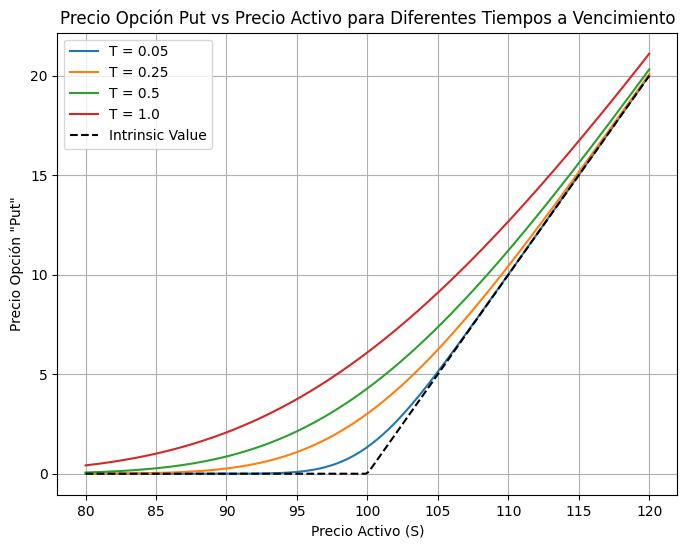

In [7]:
S_T = 100.0
r_f = 0.0025
sigma = 0.15
q = 0.0

S_range = np.linspace(80, 120, 200)
T_values = [0.05, 0.25, 0.5, 1.0]

plt.figure(figsize=(8, 6))

for T in T_values:
    call_prices = []
    for S in S_range:
        call = bs.BlackScholesCall(S, S_T, T, r_f, sigma, q)
        call_prices.append(call.price())
    plt.plot(S_range, call_prices, label=f'T = {T}')
intrinsic_values = np.maximum(S_range - S_T, 0)
plt.plot(S_range, intrinsic_values, 'k--', label='Intrinsic Value')
plt.xlabel('Precio Activo (S)')
plt.ylabel('Precio Opción "Put"')
plt.title('Precio Opción Put vs Precio Activo para Diferentes Tiempos a Vencimiento')
plt.legend()
plt.grid(True)
plt.show()

# Cambio en el precio de la opción "Put" con distinto tiempo a vencimiento
## *Visualización 3D*

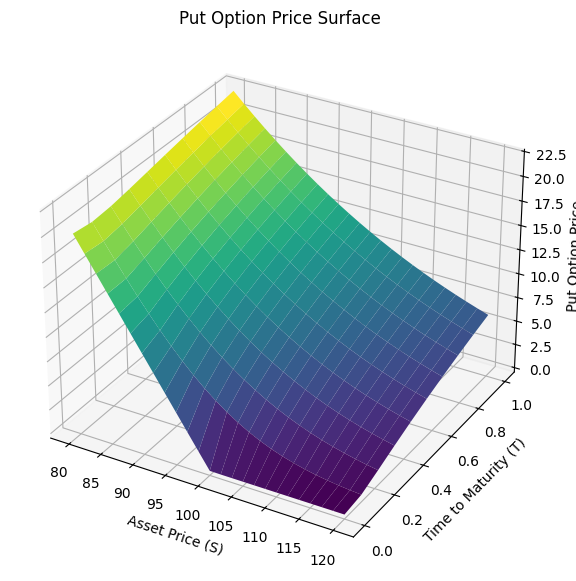

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

S_T = 100.0      # Strike price
r_f = 0.035     # 3.5% Risk-free rate
sigma = 0.35     # 35% Volatility
q = 0.0          # 0% Annual Dividend Yield

S_range = np.linspace(80, 120, 25)           # Range of asset prices
T_range = np.linspace(0.000001, 1.0, 10)     # Range of times to maturity

S_grid, T_grid = np.meshgrid(S_range, T_range)
P_grid = np.zeros_like(S_grid)

for i in range(S_grid.shape[0]):
    for j in range(S_grid.shape[1]):
        S = S_grid[i, j]
        T = T_grid[i, j]
        put = bs.BlackScholesPut(S, S_T, T, r_f, sigma, q)
        P_grid[i, j] = put.price()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(S_grid, T_grid, P_grid, cmap='viridis', edgecolor='none')

ax.set_xlabel('Asset Price (S)')
ax.set_ylabel('Time to Maturity (T)')
ax.set_zlabel('Put Option Price')
ax.set_title('Put Option Price Surface')
# fig.colorbar(surf, shrink=0.5, aspect=10, label='Put Price')
plt.show()

In [ ]:
import plotly.graph_objs as go

S_grid, T_grid = np.meshgrid(S_range, T_values)
P_grid = np.zeros_like(S_grid)

for i in range(S_grid.shape[0]):
    for j in range(S_grid.shape[1]):
        S = S_grid[i, j]
        T = T_grid[i, j]
        put = bs.BlackScholesPut(S, S_T, T, r_f, sigma, q)
        P_grid[i, j] = put.price()

fig = go.Figure(data=[go.Surface(z=P_grid, x=S_grid, y=T_grid, colorscale='Viridis')])
fig.update_layout(
    title='Superficie de Precio de Opción Put (Plotly)',
    scene=dict(
        xaxis_title='Precio del Activo (S)',
        yaxis_title='Tiempo al Vencimiento (T)',
        zaxis_title='Precio Opción Put'
    ),
    width=800,
    height=600
)
fig.show()

# Cambio en el precio de la opción "Call" con distinto tiempo a vencimiento
## *Visualización 3D*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from blackscholes import BlackScholesCall

S_T = 100.0      # Strike price
r_f = 0.035     # 3.5% Risk-free rate
sigma = 0.35     # 35% Volatility
q = 0.0          # 0% Annual Dividend Yield

S_range = np.linspace(80, 120, 25)           # Range of asset prices
T_range = np.linspace(0.000001, 1.0, 10)     # Range of times to maturity

S_grid, T_grid = np.meshgrid(S_range, T_range)
P_grid = np.zeros_like(S_grid)

for i in range(S_grid.shape[0]):
    for j in range(S_grid.shape[1]):
        S = S_grid[i, j]
        T = T_grid[i, j]
        call = BlackScholesCall(S, S_T, T, r_f, sigma, q)
        C_grid[i, j] = call.price()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(S_grid, T_grid, C_grid, cmap='viridis', edgecolor='none')

ax.set_xlabel('Asset Price (S)')
ax.set_ylabel('Time to Maturity (T)')
ax.set_zlabel('Call Option Price')
ax.set_title('Call Option Price Surface')
# fig.colorbar(surf, shrink=0.5, aspect=10, label='Put Price')
plt.show()